# Predicting buying Insurance

In [189]:
#imporing neccesary libararies
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
#importing training_dataset
df = pd.read_csv('train.csv')

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
#installing imblearn for smote
!pip3 install imblearn

You should consider upgrading via the 'c:\users\m vasil ansari\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
#dataset
df

,id,blood_group,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,accepted
0,223723,O,Female,23,1,18.0,1,< 1 Year,No,29223.0,152.0,89,70,65,0
1,102674,AB-,Male,44,1,23.0,0,1-2 Year,Yes,28501.0,26.0,111,61,66,1
2,15567,AB+,Male,23,1,41.0,0,< 1 Year,Yes,32590.0,152.0,71,67,78,0
3,222937,O,Male,78,1,15.0,1,1-2 Year,No,2630.0,14.0,245,74,63,0
4,32565,B+,Female,25,1,44.0,1,< 1 Year,No,31821.0,152.0,59,73,62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266771,349992,O,Male,24,1,28.0,1,< 1 Year,No,49840.0,152.0,39,72,74,0
266772,260914,AB+,Male,41,1,14.0,0,1-2 Year,Yes,31399.0,26.0,25,63,75,0
266773,214966,AB+,Male,44,1,3.0,0,1-2 Year,Yes,21292.0,26.0,36,73,70,0
266774,200722,B+,Male,38,1,30.0,1,1-2 Year,Yes,29448.0,26.0,117,62,76,0


In [3]:
#visualising labels 
df['accepted'].value_counts(normalize = True)

0    0.877437
1    0.122563
Name: accepted, dtype: float64

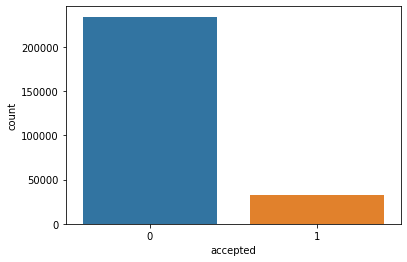

In [4]:
#visulising columns
sns.countplot(x='accepted',data=df)

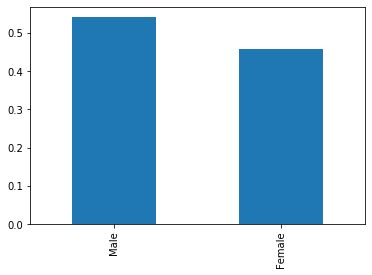

In [5]:
df['Gender'].value_counts(normalize = True).plot(kind="bar")

In [182]:
#extracting features and labels from training dataset
features = df.iloc[:,[1,2,3,5,6,7,8,9,10,11,12,13]]
result = df.iloc[:,-1]

In [188]:
features

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,AB-,B+,O,Male,1,2,Yes
0,23,18.0,1,29223.0,152.0,89,70,65,0,0,1,0,0,0,0
1,44,23.0,0,28501.0,26.0,111,61,66,1,0,0,1,1,0,1
2,23,41.0,0,32590.0,152.0,71,67,78,0,0,0,1,0,0,1
3,78,15.0,1,2630.0,14.0,245,74,63,0,0,1,1,1,0,0
4,25,44.0,1,31821.0,152.0,59,73,62,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266771,24,28.0,1,49840.0,152.0,39,72,74,0,0,1,1,0,0,0
266772,41,14.0,0,31399.0,26.0,25,63,75,0,0,0,1,1,0,1
266773,44,3.0,0,21292.0,26.0,36,73,70,0,0,0,1,1,0,1
266774,38,30.0,1,29448.0,26.0,117,62,76,0,1,0,1,1,0,1


In [186]:
#dealing with categorical features
va=pd.get_dummies(features['vehicle_age'],drop_first=True)
bg=pd.get_dummies(features['blood_group'],drop_first=True)
g=pd.get_dummies(features['Gender'],drop_first=True)
vd=pd.get_dummies(features['Vehicle_Damage'],drop_first=True)

features=features.drop(['blood_group','Gender','Vehicle_Age','Vehicle_Damage','vehicle_age'],axis=1)

features=pd.concat([features,bg,g,va,vd],axis=1)

In [187]:
result

0         0
1         1
2         0
3         0
4         0
         ..
266771    0
266772    0
266773    0
266774    0
266775    0
Name: accepted, Length: 266776, dtype: int64

In [190]:
#splitting into training and test set for visualising accuracy on basis of f1-score
X_train, X_test, y_train, y_test = train_test_split(features, result, test_size = 0.2, random_state = 14)

In [191]:
y_train.describe()

count    213420.000000
mean          0.121826
std           0.327085
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: accepted, dtype: float64

In [192]:
y_test.describe()

count    53356.000000
mean         0.125515
std          0.331306
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: accepted, dtype: float64

In [194]:
X_train

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,AB-,B+,O,Male,1,2,Yes
154163,26,46.0,0,37828.0,152.0,78,73,73,0,0,0,0,0,0,1
21132,65,48.0,0,2630.0,4.0,194,72,65,0,0,0,1,1,0,1
5700,26,35.0,1,33591.0,152.0,74,71,64,1,0,0,0,0,0,0
18731,22,13.0,1,33171.0,152.0,220,71,64,1,0,0,0,0,0,0
162596,40,41.0,0,20635.0,124.0,144,77,62,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237032,54,28.0,0,44202.0,154.0,177,73,76,1,0,0,1,0,1,1
187036,25,30.0,1,28855.0,152.0,105,78,74,0,0,0,1,0,0,0
117142,72,27.0,0,23317.0,26.0,60,67,79,0,0,0,1,1,0,0
79192,58,28.0,0,45739.0,26.0,151,62,75,0,0,1,0,0,1,1


# Over-Sampling using SMOTE,SMOTEENN,SMOTE-TOMEK,ADA

In [193]:
from collections import Counter 

In [195]:
from imblearn.over_sampling import SMOTE
counter =Counter(y_train)
print('Before',counter)
smt=SMOTE()
X_train_sm,y_train_sm=smt.fit_resample(X_train,y_train)
counter=Counter(y_train_sm)
print('After',counter)

Before Counter({0: 187420, 1: 26000})
After Counter({0: 187420, 1: 187420})


In [196]:
from imblearn.over_sampling import ADASYN
counter =Counter(y_train)
print('Before',counter)
ada=ADASYN(random_state=130)
X_train_ada,y_train_ada=ada.fit_resample(X_train,y_train)
counter=Counter(y_train_ada)
print('After',counter)

Before Counter({0: 187420, 1: 26000})
After Counter({1: 195028, 0: 187420})


In [197]:
from imblearn.combine import SMOTEENN
counter =Counter(y_train)
print('Before',counter)
smenn=SMOTEENN()
X_train_smenn,y_train_smenn=smenn.fit_resample(X_train,y_train)
counter=Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 187420, 1: 26000})
After Counter({1: 167476, 0: 107122})


In [198]:
from imblearn.combine import SMOTETomek
counter =Counter(y_train)
print('Before',counter)
smtomek=SMOTETomek(random_state=139)
X_train_smt,y_train_smt=smtomek.fit_resample(X_train,y_train)
counter=Counter(y_train_smt)
print('After',counter)

Before Counter({0: 187420, 1: 26000})
After Counter({0: 184624, 1: 184624})


# Random Forest for feature Importance

In [176]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_smenn, y_train_smenn)
# Making predictions on unseen data
predictions_rf = rf.predict(X_test)

In [177]:
rf.feature_importances_

array([0.15556986, 0.00028442, 0.0516743 , 0.21899595, 0.05677301,
       0.12006902, 0.05763726, 0.04040538, 0.04068047, 0.02201434,
       0.02234606, 0.02288953, 0.00756382, 0.01420645, 0.00584086,
       0.16304928])

([<matplotlib.axis.XTick at 0x26d011ab048>,
 <a list of 16 Text xticklabel objects>)

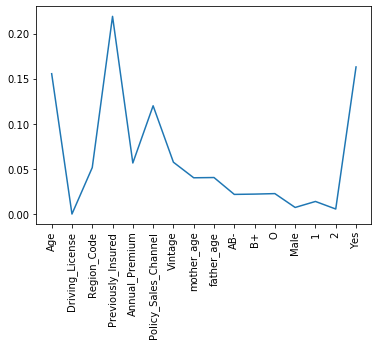

In [178]:
# what features are the most important?
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(X_train_sm.shape[1]), X_train_sm.columns.tolist(), rotation=90)

In [179]:
# View a list of the features and their importance scores
list(zip(features, rf.feature_importances_))

[('Age', 0.15556985698626463),
 ('Driving_License', 0.00028441607385735313),
 ('Region_Code', 0.05167430081911562),
 ('Previously_Insured', 0.21899594613103004),
 ('Annual_Premium', 0.056773010184589426),
 ('Policy_Sales_Channel', 0.12006902242318176),
 ('Vintage', 0.05763725790463974),
 ('mother_age', 0.040405376754215204),
 ('father_age', 0.04068046606025854),
 ('AB-', 0.022014341155907644),
 ('B+', 0.022346062574637945),
 ('O', 0.022889526656920775),
 ('Male', 0.007563820108269223),
 (1, 0.014206453966304553),
 (2, 0.0058408624632096205),
 ('Yes', 0.163049279737598)]

In [23]:
print(classification_report(y_test, predictions_rf))
print(confusion_matrix(y_test, predictions_rf))
# Under ROC curve
prob_rf = rf.predict_proba(X_test)
prob_rf = [p[1] for p in prob_rf]
print(roc_auc_score(y_test, prob_rf))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     46659
           1       0.31      0.35      0.33      6697

    accuracy                           0.82     53356
   macro avg       0.61      0.62      0.61     53356
weighted avg       0.83      0.82      0.83     53356

[[41552  5107]
 [ 4351  2346]]
0.8262183218864934


SMOTE:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     46659
           1       0.32      0.35      0.33      6697

    accuracy                           0.82     53356
   macro avg       0.61      0.62      0.62     53356
weighted avg       0.83      0.82      0.83     53356

[[41490  5169]
 [ 4320  2377]]
0.8263150527249794

In [37]:
#standard Scaling/feature Scaling
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [38]:
X_train_std_sm = scaler.fit_transform(X_train_sm)
X_train_std_ada = scaler.fit_transform(X_train_ada)
X_train_std_smt = scaler.fit_transform(X_train_smt)
X_train_std_smenn = scaler.fit_transform(X_train_smenn)

# Features upsampling

In [72]:
from sklearn.utils import resample
df_minority = df[df.accepted==1]
df_majority = df[df.accepted==0]
df['accepted'].value_counts()

0    234079
1     32697
Name: accepted, dtype: int64

In [102]:
df_majority

,id,blood_group,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,accepted
0,223723,O,Female,23,1,18.0,1,< 1 Year,No,29223.0,152.0,89,70,65,0
2,15567,AB+,Male,23,1,41.0,0,< 1 Year,Yes,32590.0,152.0,71,67,78,0
3,222937,O,Male,78,1,15.0,1,1-2 Year,No,2630.0,14.0,245,74,63,0
4,32565,B+,Female,25,1,44.0,1,< 1 Year,No,31821.0,152.0,59,73,62,0
5,213918,AB-,Male,67,1,8.0,0,1-2 Year,Yes,36756.0,124.0,258,73,70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266771,349992,O,Male,24,1,28.0,1,< 1 Year,No,49840.0,152.0,39,72,74,0
266772,260914,AB+,Male,41,1,14.0,0,1-2 Year,Yes,31399.0,26.0,25,63,75,0
266773,214966,AB+,Male,44,1,3.0,0,1-2 Year,Yes,21292.0,26.0,36,73,70,0
266774,200722,B+,Male,38,1,30.0,1,1-2 Year,Yes,29448.0,26.0,117,62,76,0


In [117]:
# sample with replacement to match majority class and get #reproducible results
df_majority_upsampled = resample(df_majority, 
                                 replace=True,     
                                 n_samples=70500,    
                                 random_state=123)
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=70500,    
                                 random_state=123)
 
df_upsampled=pd.concat([df_minority_upsampled,df_majority_upsampled],axis=0)
# Display new class counts
df_upsampled.accepted.value_counts()

1    70500
0    70500
Name: accepted, dtype: int64

In [118]:
df_upsampled

,id,blood_group,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,accepted
163179,130109,AB-,Female,45,1,35.0,0,> 2 Years,Yes,40174.0,26.0,252,66,78,1
128704,74426,AB-,Male,43,1,39.0,1,1-2 Year,No,31557.0,154.0,261,66,68,1
228749,304440,O,Male,50,1,29.0,0,1-2 Year,Yes,2630.0,124.0,40,68,77,1
145444,312754,AB-,Female,28,1,15.0,0,1-2 Year,Yes,27930.0,163.0,207,61,62,1
233560,69941,AB+,Female,39,1,3.0,0,1-2 Year,Yes,33470.0,26.0,228,61,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205467,136131,AB-,Male,43,1,48.0,0,1-2 Year,Yes,2630.0,157.0,29,65,61,0
205080,11593,B+,Male,59,1,50.0,1,1-2 Year,No,34339.0,26.0,158,64,65,0
204210,141372,O,Male,72,1,28.0,0,1-2 Year,Yes,33924.0,124.0,90,78,66,0
71584,13871,O,Male,37,1,30.0,0,1-2 Year,Yes,39442.0,124.0,70,74,74,0


In [119]:
# Train/test, normalize the new data set
features_upsampled = df_upsampled.iloc[:,1:-1]
result_upsampled = df_upsampled.iloc[:,-1]

In [122]:
features_upsampled

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,AB-,B+,O,Male,< 1 Year,> 2 Years,Yes
163179,45,1,35.0,0,40174.0,26.0,252,66,78,1,0,0,0,0,1,1
128704,43,1,39.0,1,31557.0,154.0,261,66,68,1,0,0,1,0,0,0
228749,50,1,29.0,0,2630.0,124.0,40,68,77,0,0,1,1,0,0,1
145444,28,1,15.0,0,27930.0,163.0,207,61,62,1,0,0,0,0,0,1
233560,39,1,3.0,0,33470.0,26.0,228,61,66,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205467,43,1,48.0,0,2630.0,157.0,29,65,61,1,0,0,1,0,0,1
205080,59,1,50.0,1,34339.0,26.0,158,64,65,0,1,0,1,0,0,0
204210,72,1,28.0,0,33924.0,124.0,90,78,66,0,0,1,1,0,0,1
71584,37,1,30.0,0,39442.0,124.0,70,74,74,0,0,1,1,0,0,1


In [121]:
va=pd.get_dummies(features_upsampled['Vehicle_Age'],drop_first=True)
bg=pd.get_dummies(features_upsampled['blood_group'],drop_first=True)
g=pd.get_dummies(features_upsampled['Gender'],drop_first=True)
vd=pd.get_dummies(features_upsampled['Vehicle_Damage'],drop_first=True)

features_upsampled=features_upsampled.drop(['blood_group','Vehicle_Age','Gender','Vehicle_Damage'],axis=1)

features_upsampled=pd.concat([features_upsampled,bg,g,va,vd],axis=1)

In [130]:

X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(features_upsampled, result_upsampled, test_size = 0.2, random_state = 14)
X_train_std_upsampled = scaler.fit_transform(X_train_upsampled)
X_test_std_upsampled = scaler.fit_transform(X_test_upsampled)
# new log model for upsampled data
logmodel_upsampled = LogisticRegression(solver='liblinear')
logmodel_upsampled.fit(X_train_std_upsampled, y_train_upsampled)
predictions_y_2_upsampled = logmodel_upsampled.predict_proba(X_test_std_upsampled)
from sklearn.preprocessing import binarize
predictions_y_2_upsampled=binarize(predictions_y_2_upsampled,0.1)[:,1]

print(classification_report(y_test_upsampled, predictions_y_2_upsampled))
print(confusion_matrix(y_test_upsampled, predictions_y_2_upsampled))
accuracy_score(y_test_upsampled, predictions_y_2_upsampled)
# Under ROC curve
prob_y_2_upsampled = logmodel_upsampled.predict_proba(X_test_std_upsampled)
prob_y_2_upsampled = [p[1] for p in prob_y_2_upsampled]
print(roc_auc_score(y_test_upsampled, prob_y_2_upsampled))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69     14166
           1       0.68      1.00      0.81     14034

    accuracy                           0.76     28200
   macro avg       0.84      0.76      0.75     28200
weighted avg       0.84      0.76      0.75     28200

[[ 7453  6713]
 [   35 13999]]
0.8350179887247065


In [124]:
logmodel_lowering = LogisticRegression(solver='liblinear')
logmodel_lowering.fit(X_train_std_upsampled, y_train_upsampled)
from sklearn.preprocessing import binarize
for i in range(1,7):
    cm2=0
    predictions_y_2_lowering = logmodel_lowering.predict_proba(X_test_std_upsampled)
    y_pred2_lowering=binarize(predictions_y_2_lowering,i/10)[:,1]
    cm2=confusion_matrix(y_test_upsampled,y_pred2_lowering)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[ 7453  6713]
 [   35 13999]] 
 with 21452 correct predictions and 35 Type II errors( False Negatives) 

 Sensitivity:  0.9975060567193957 Specificity:  0.5261188761824086 



With 0.2 threshold the Confusion Matrix is  
 [[ 7980  6186]
 [  140 13894]] 
 with 21874 correct predictions and 140 Type II errors( False Negatives) 

 Sensitivity:  0.990024226877583 Specificity:  0.5633206268530284 



With 0.3 threshold the Confusion Matrix is  
 [[ 8286  5880]
 [  243 13791]] 
 with 22077 correct predictions and 243 Type II errors( False Negatives) 

 Sensitivity:  0.9826849080803762 Specificity:  0.5849216433714528 



With 0.4 threshold the Confusion Matrix is  
 [[ 8422  5744]
 [  308 13726]] 
 with 22148 correct predictions and 308 Type II errors( False Negatives) 

 Sensitivity:  0.9780532991306826 Specificity:  0.5945220951574192 



With 0.5 threshold the Confusion Matrix is  
 [[ 8438  5728]
 [  336 13698]] 
 with 22136 correct predicti

# Bagging Classifier

In [24]:
from sklearn.ensemble import BaggingClassifier

In [36]:
from sklearn.model_selection import GridSearchCV
n_estimators = [50, 60,80,100]
max_samples = [0.8,1.0]
param_grid = dict(n_estimators = n_estimators, max_samples=max_samples)
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 10)
grid_search_b = GridSearchCV(BaggingClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1, cv=kfold, verbose = 1)

In [37]:
result_gcv_b=grid_search_b.fit(X_train_std_smenn,y_train_smenn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 26.5min finished


In [38]:
print("Best: %f using %s" % (result_gcv_b.best_score_, result_gcv_b.best_params_))

Best: 0.969826 using {'max_samples': 1.0, 'n_estimators': 100}


In [60]:
bclassifier=BaggingClassifier(max_samples=1.0,n_estimators=100)
bclassifier.fit(X_train_std_smt,y_train_smt)

BaggingClassifier(n_estimators=100)

In [61]:
predictions_bagg = bclassifier.predict(X_test)

In [62]:
print(classification_report(y_test, predictions_bagg))
cm2=confusion_matrix(y_test, predictions_bagg)
# Under ROC curve
prob_bagg = bclassifier.predict_proba(X_test)
prob_bagg = [p[1] for p in prob_bagg]
print(roc_auc_score(y_test, prob_bagg))
print ('the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

              precision    recall  f1-score   support

           0       0.90      0.78      0.83     46659
           1       0.19      0.37      0.26      6697

    accuracy                           0.73     53356
   macro avg       0.55      0.58      0.54     53356
weighted avg       0.81      0.73      0.76     53356

0.7232922325837552
the Confusion Matrix is  
 [[36278 10381]
 [ 4201  2496]] 
 with 38774 correct predictions and 4201 Type II errors( False Negatives) 

 Sensitivity:  0.3727041959086158 Specificity:  0.7775134486379905 





# Logistic Regression without weights

In [135]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train_std_sm, y_train_sm)
predictions_y_2 = logmodel.predict(X_test_std)

In [136]:
print(classification_report(y_test, predictions_y_2))
print(confusion_matrix(y_test, predictions_y_2))
# Under ROC curve
prob_y_2 = logmodel.predict_proba(X_test_std)
prob_y_2 = [p[1] for p in prob_y_2]
print(roc_auc_score(y_test, prob_y_2))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69     46659
           1       0.23      1.00      0.38      6697

    accuracy                           0.59     53356
   macro avg       0.62      0.76      0.54     53356
weighted avg       0.90      0.59      0.65     53356

[[24768 21891]
 [   32  6665]]
0.7899113268538008


In [108]:
logmodel = LogisticRegression(solver='liblinear', class_weight='balanced')
logmodel.fit(X_train_std_sm, y_train_sm)
predictions_y_3 = logmodel.predict(X_test_std)

print(classification_report(y_test, predictions_y_3))
print(confusion_matrix(y_test, predictions_y_3))
accuracy_score(y_test, predictions_y_3)
# Under ROC curve
prob_y_3 = logmodel.predict_proba(X_test_std)
prob_y_3 = [p[1] for p in prob_y_3]
print(roc_auc_score(y_test, prob_y_3))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71     46659
           1       0.24      0.99      0.39      6697

    accuracy                           0.60     53356
   macro avg       0.62      0.77      0.55     53356
weighted avg       0.90      0.60      0.67     53356

[[25605 21054]
 [   66  6631]]
0.8087671710319344


In [34]:
X_train

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,AB-,B+,O,Male,< 1 Year,> 2 Years,Yes
154163,26,1,46.0,0,37828.0,152.0,78,73,73,0,0,0,0,1,0,1
21132,65,1,48.0,0,2630.0,4.0,194,72,65,0,0,0,1,0,0,1
5700,26,1,35.0,1,33591.0,152.0,74,71,64,1,0,0,0,1,0,0
18731,22,1,13.0,1,33171.0,152.0,220,71,64,1,0,0,0,1,0,0
162596,40,1,41.0,0,20635.0,124.0,144,77,62,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237032,54,1,28.0,0,44202.0,154.0,177,73,76,1,0,0,1,0,1,1
187036,25,1,30.0,1,28855.0,152.0,105,78,74,0,0,0,1,1,0,0
117142,72,1,27.0,0,23317.0,26.0,60,67,79,0,0,0,1,0,0,0
79192,58,1,28.0,0,45739.0,26.0,151,62,75,0,0,1,0,0,1,1


# logistic regression with random weights

In [33]:
df['accepted'].value_counts(normalize = True)
weights = {0 : '0.848113', 1 : '0.151887'}
logmodel_auto = LogisticRegression(class_weight = weights, solver = 'liblinear')
logmodel_auto.fit(X_train_std_sm, y_train_sm)
predictions_std_auto = logmodel_auto.predict(X_test_std)
print(classification_report(y_test, predictions_std_auto))
print(confusion_matrix(y_test, predictions_std_auto))
accuracy_score(y_test, predictions_std_auto)
# Under ROC curve
prob_y_4 = logmodel.predict_proba(X_test_std)
prob_y_4 = [p[1] for p in prob_y_4]
print(roc_auc_score(y_test, prob_y_4))

              precision    recall  f1-score   support

           0       0.94      0.75      0.84     46659
           1       0.28      0.68      0.40      6697

    accuracy                           0.74     53356
   macro avg       0.61      0.72      0.62     53356
weighted avg       0.86      0.74      0.78     53356

[[35005 11654]
 [ 2125  4572]]
0.8076080587010064


# Random Forest Classifier with best suitable weights for classes

In [153]:
from sklearn.model_selection import GridSearchCV
weights = np.linspace(0.03, 0.97, 55)
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
gsc = GridSearchCV(
    estimator=LogisticRegression(solver='liblinear'),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='roc_auc',
    cv=5,n_jobs=-1
)


In [154]:
grid_result = gsc.fit(X_train_std_ada, y_train_ada)

In [155]:
print("Best parameters : %s" % grid_result.best_params_) #smenn,ada

Best parameters : {'class_weight': {0: 0.882962962962963, 1: 0.11703703703703705}}


In [156]:

# passing weights found above
rf_w = RandomForestClassifier(class_weight = {0: 0.882962962962963, 1: 0.11703703703703705})
rf_w.fit(X_train_ada, y_train_ada)
predictions_rf_w=rf_w.predict(X_test)
print(classification_report(y_test, predictions_rf_w))
cm2=confusion_matrix(y_test, predictions_rf_w)
accuracy_score(y_test, predictions_rf_w)
print ('the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     46659
           1       0.31      0.42      0.36      6697

    accuracy                           0.81     53356
   macro avg       0.61      0.64      0.62     53356
weighted avg       0.84      0.81      0.82     53356

the Confusion Matrix is  
 [[40495  6164]
 [ 3897  2800]] 
 with 43295 correct predictions and 3897 Type II errors( False Negatives) 

 Sensitivity:  0.4180976556667164 Specificity:  0.8678925823528151 





SMOTE:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     46659
           1       0.32      0.41      0.36      6697

    accuracy                           0.82     53356
   macro avg       0.62      0.64      0.63     53356
weighted avg       0.84      0.82      0.83     53356

[[40734  5925]
 [ 3930  2767]]
0.8152972486693155
 

# Logistic-Regression with weights

In [157]:
weights = {0: '0.882962962962963', 1: '0.11703703703703705'}
logmodel_auto_gridsearch = LogisticRegression(class_weight = weights, solver = 'liblinear')
logmodel_auto_gridsearch.fit(X_train_std_ada, y_train_ada)
predictions_std_auto_gridsearch = logmodel_auto_gridsearch.predict(X_test_std)
print(classification_report(y_test, predictions_std_auto_gridsearch))
cm2=confusion_matrix(y_test, predictions_std_auto_gridsearch)
accuracy_score(y_test, predictions_std_auto_gridsearch)
# Under ROC curve
prob_y_3_gridsearch = logmodel_auto_gridsearch.predict_proba(X_test_std)
prob_y_3_gridsearch= [p[1] for p in prob_y_3_gridsearch]
print(roc_auc_score(y_test, prob_y_3_gridsearch))
print ('the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     46659
           1       0.23      0.25      0.24      6697

    accuracy                           0.80     53356
   macro avg       0.56      0.57      0.56     53356
weighted avg       0.81      0.80      0.81     53356

0.788843168905213
the Confusion Matrix is  
 [[41081  5578]
 [ 4999  1698]] 
 with 42779 correct predictions and 4999 Type II errors( False Negatives) 

 Sensitivity:  0.2535463640436016 Specificity:  0.880451788508112 





In [158]:
logmodel_lowering = LogisticRegression(solver='liblinear',class_weight={0: '0.882962962962963', 1: '0.11703703703703705'})
logmodel_lowering.fit(X_train_std_ada, y_train_ada)
from sklearn.preprocessing import binarize
for i in range(1,10):
    cm2=0
    predictions_y_2_lowering = logmodel_lowering.predict_proba(X_test_std)
    y_pred2_lowering=binarize(predictions_y_2_lowering,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2_lowering)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


With 0.1 threshold the Confusion Matrix is  
 [[24366 22293]
 [   14  6683]] 
 with 31049 correct predictions and 14 Type II errors( False Negatives) 

 Sensitivity:  0.9979095117216664 Specificity:  0.5222143637883366 



With 0.2 threshold the Confusion Matrix is  
 [[26613 20046]
 [  109  6588]] 
 with 33201 correct predictions and 109 Type II errors( False Negatives) 

 Sensitivity:  0.98372405554726 Specificity:  0.5703722754452517 





C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


With 0.3 threshold the Confusion Matrix is  
 [[26843 19816]
 [  134  6563]] 
 with 33406 correct predictions and 134 Type II errors( False Negatives) 

 Sensitivity:  0.9799910407645215 Specificity:  0.5753016567007437 



With 0.4 threshold the Confusion Matrix is  
 [[35195 11464]
 [ 2682  4015]] 
 with 39210 correct predictions and 2682 Type II errors( False Negatives) 

 Sensitivity:  0.5995221741078095 Specificity:  0.7543024925523479 





C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


With 0.5 threshold the Confusion Matrix is  
 [[41081  5578]
 [ 4999  1698]] 
 with 42779 correct predictions and 4999 Type II errors( False Negatives) 

 Sensitivity:  0.2535463640436016 Specificity:  0.880451788508112 



With 0.6 threshold the Confusion Matrix is  
 [[41798  4861]
 [ 5121  1576]] 
 with 43374 correct predictions and 5121 Type II errors( False Negatives) 

 Sensitivity:  0.23532925190383755 Specificity:  0.8958185987697979 





C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


With 0.7 threshold the Confusion Matrix is  
 [[41858  4801]
 [ 5125  1572]] 
 with 43430 correct predictions and 5125 Type II errors( False Negatives) 

 Sensitivity:  0.23473196953859937 Specificity:  0.8971045243147089 



With 0.8 threshold the Confusion Matrix is  
 [[44177  2482]
 [ 5764   933]] 
 with 45110 correct predictions and 5764 Type II errors( False Negatives) 

 Sensitivity:  0.1393161116918023 Specificity:  0.9468055466255171 





C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


With 0.9 threshold the Confusion Matrix is  
 [[46659     0]
 [ 6697     0]] 
 with 46659 correct predictions and 6697 Type II errors( False Negatives) 

 Sensitivity:  0.0 Specificity:  1.0 





# XGB-REGRESSOR

In [155]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.05,
max_depth = 9, alpha = 10, n_estimators = 20)
eval_set = [(X_test_std, y_test)]
xg_reg.fit(X_train_std_ada, y_train_ada, eval_metric="error", eval_set = eval_set, verbose = True)
prediction_y_5=xg_reg.predict(X_test_std)
rmse = np.sqrt(mean_squared_error(y_test, prediction_y_5))
print("RMSE: %f" % (rmse))

[0]	validation_0-error:0.616088
[1]	validation_0-error:0.43862
[2]	validation_0-error:0.414911
[3]	validation_0-error:0.411406
[4]	validation_0-error:0.320826
[5]	validation_0-error:0.322925
[6]	validation_0-error:0.299573
[7]	validation_0-error:0.347721
[8]	validation_0-error:0.384474
[9]	validation_0-error:0.350982
[10]	validation_0-error:0.350382
[11]	validation_0-error:0.345716
[12]	validation_0-error:0.377933
[13]	validation_0-error:0.402991
[14]	validation_0-error:0.399074
[15]	validation_0-error:0.437776
[16]	validation_0-error:0.423439
[17]	validation_0-error:0.40316
[18]	validation_0-error:0.40271
[19]	validation_0-error:0.421808
RMSE: 0.502956


In [156]:
n_estimators = [10, 20, 30, 40, 50, 60]
max_depth = [2, 4, 5, 6, 7, 8]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(max_depth = max_depth, n_estimators = n_estimators, learning_rate=learning_rate)
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 10)
grid_search_xg = GridSearchCV(xg_reg, param_grid, scoring = 'roc_auc', n_jobs = -1, cv=kfold, verbose = 1)


In [157]:
result_gcv_xgb = grid_search_xg.fit(X_train_std_ada, y_train_ada)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 54.1min finished


In [158]:
print("Best: %f using %s" % (result_gcv_xgb.best_score_, result_gcv_xgb.best_params_))
means = result_gcv_xgb.cv_results_['mean_test_score']
stds = result_gcv_xgb.cv_results_['std_test_score']
params = result_gcv_xgb.cv_results_['params']

Best: 0.970204 using {'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 60}


In [159]:
# rebuild using best params
xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.3,
max_depth = 8, alpha = 10, n_estimators = 60)
eval_set = [(X_test_std, y_test)]
xg_reg.fit(X_train_std_ada, y_train_ada, eval_metric="error", eval_set = eval_set, verbose = False)
prediction_y_5 = xg_reg.predict(X_test_std)
rmse = np.sqrt(mean_squared_error(y_test, prediction_y_5))
print("RMSE: %f" % (rmse))

RMSE: 0.592475


In [160]:
prediction_y_5

array([0.06168026, 0.00264556, 0.85093343, ..., 0.00359445, 0.07036677,
       0.99438125], dtype=float32)

In [163]:
prediction_y_5_01 = prediction_y_5
prediction_y_5_01[prediction_y_5 > 0.5] = 1
prediction_y_5_01[prediction_y_5 <= 0.5] = 0
print(classification_report(y_test, prediction_y_5_01))
cm2=confusion_matrix(y_test, prediction_y_5_01)
accuracy_score(y_test, prediction_y_5_01)
print ('the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

              precision    recall  f1-score   support

           0       1.00      0.53      0.69     46659
           1       0.23      0.99      0.38      6697

    accuracy                           0.59     53356
   macro avg       0.62      0.76      0.54     53356
weighted avg       0.90      0.59      0.65     53356

the Confusion Matrix is  
 [[24859 21800]
 [   67  6630]] 
 with 31489 correct predictions and 67 Type II errors( False Negatives) 

 Sensitivity:  0.9899955203822607 Specificity:  0.5327803853490216 





# XGBOOST IMBALANCED CLASSIFICATION

In [43]:
# fit xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

Mean ROC AUC: nan


In [230]:
# define model
model = XGBClassifier()
model.fit(X_train_smt,y_train_smt)

XGBClassifier()

In [206]:
# count examples in each class
counter = Counter(y_train_smenn)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 0.640


In [231]:
predictions_model=model.predict(X_test)
print(classification_report(y_test, predictions_model))
cm2=confusion_matrix(y_test, predictions_model)
accuracy_score(y_test, predictions_model)
print ('the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     46659
           1       0.30      0.54      0.39      6697

    accuracy                           0.78     53356
   macro avg       0.61      0.68      0.63     53356
weighted avg       0.85      0.78      0.81     53356

the Confusion Matrix is  
 [[38199  8460]
 [ 3070  3627]] 
 with 41826 correct predictions and 3070 Type II errors( False Negatives) 

 Sensitivity:  0.5415857846797073 Specificity:  0.8186844981675561 





# Submitting predictions for test-set

In [210]:
#testing dataset
test_set=pd.read_csv('test.csv')

In [211]:
#extracting features of testing dataset
X_test_=test_set.iloc[:,[1,2,3,5,6,7,8,9,10,11,12,13]]

In [146]:
#dealing with categorical features
#va=pd.get_dummies(X_test_['Vehicle_Age'],drop_first=True)
bg=pd.get_dummies(X_test_['blood_group'],drop_first=True)
#g=pd.get_dummies(X_test_['Gender'],drop_first=True)
vd=pd.get_dummies(X_test_['Vehicle_Damage'],drop_first=True)

X_test_=X_test_.drop(['blood_group','Vehicle_Damage'],axis=1)

X_test_=pd.concat([X_test_,bg,vd],axis=1)

In [148]:
#feature Scaling
scaler = StandardScaler()
X_test_std_ = scaler.fit_transform(X_test_)

In [ ]:
#model for prediction
model

In [233]:
#predicting testing dataset
predictions_test_ = model.predict(X_test_)

In [187]:
from sklearn.preprocessing import binarize
predictions_test_=binarize(predictions_test_,0.3)[:,1].astype('int')

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [150]:
predictions_test_ = rf_w.predict(X_test_).astype('str')

In [235]:
#converting to string type
predictions_test_=predictions_test_.astype('str')

In [ ]:
#predicted results
predictions_test_

In [236]:
#Submiiting predictions
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'id':pd.read_csv('test.csv').id,'accepted':prediction})
  my_submission.to_csv('{}'.format(sub_name),index=False)
  print('A submission file has been made')
make_submission(predictions_test_[:],'Submission_xgboost_3.csv')

A submission file has been made
